In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, f1_score
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
import ast
import os
import seaborn as sns

In [2]:
# Current working directory where your notebook is running
current_path = '/Users/hardie/tables-for-JF'
print("Current working directory:", current_path)

Current working directory: /Users/hardie/tables-for-JF


In [3]:
path_to_train_data = os.path.join(current_path, 'late-fusion-w-gate', 'lf-gated-train_06-01_01-53.csv')
path_to_val_data = os.path.join(current_path, 'late-fusion-w-gate', 'lf-gated-val_06-01_01-53.csv')
path_to_test_data = os.path.join(current_path, 'df_TEST_LF.csv')

In [4]:
# Reading the data
train_data = pd.read_csv(path_to_train_data)
val_data = pd.read_csv(path_to_val_data)
test_data = pd.read_csv(path_to_test_data)

In [5]:
train_data['ground_truth'] = train_data['ground_truth'].apply(lambda x: ast.literal_eval(x))
train_data['ground_truth'] = train_data['ground_truth'].apply(lambda x: x[0] if len(x) == 1 else x)
# train_df['ground_truth'] = train_df['ground_truth'].apply(lambda x: [float(i) for i in x])

val_data['ground_truth'] = val_data['ground_truth'].apply(lambda x: ast.literal_eval(x))
val_data['ground_truth'] = val_data['ground_truth'].apply(lambda x: x[0] if len(x) == 1 else x)

# test_data['ground_truth'] = test_data['ground_truth'].apply(lambda x: ast.literal_eval(x))
# test_data['ground_truth'] = test_data['ground_truth'].apply(lambda x: x[0] if len(x) == 1 else x)

In [6]:
test_data['ensemble_output']

0       0.034952
1       0.068434
2       0.004079
3       0.028599
4       0.005453
          ...   
5780    0.005223
5781    0.047279
5782    0.002172
5783    0.067422
5784    0.639402
Name: ensemble_output, Length: 5785, dtype: float64

In [7]:
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = r'\usepackage{cmbright}'
plt.rcParams['font.size'] = 14

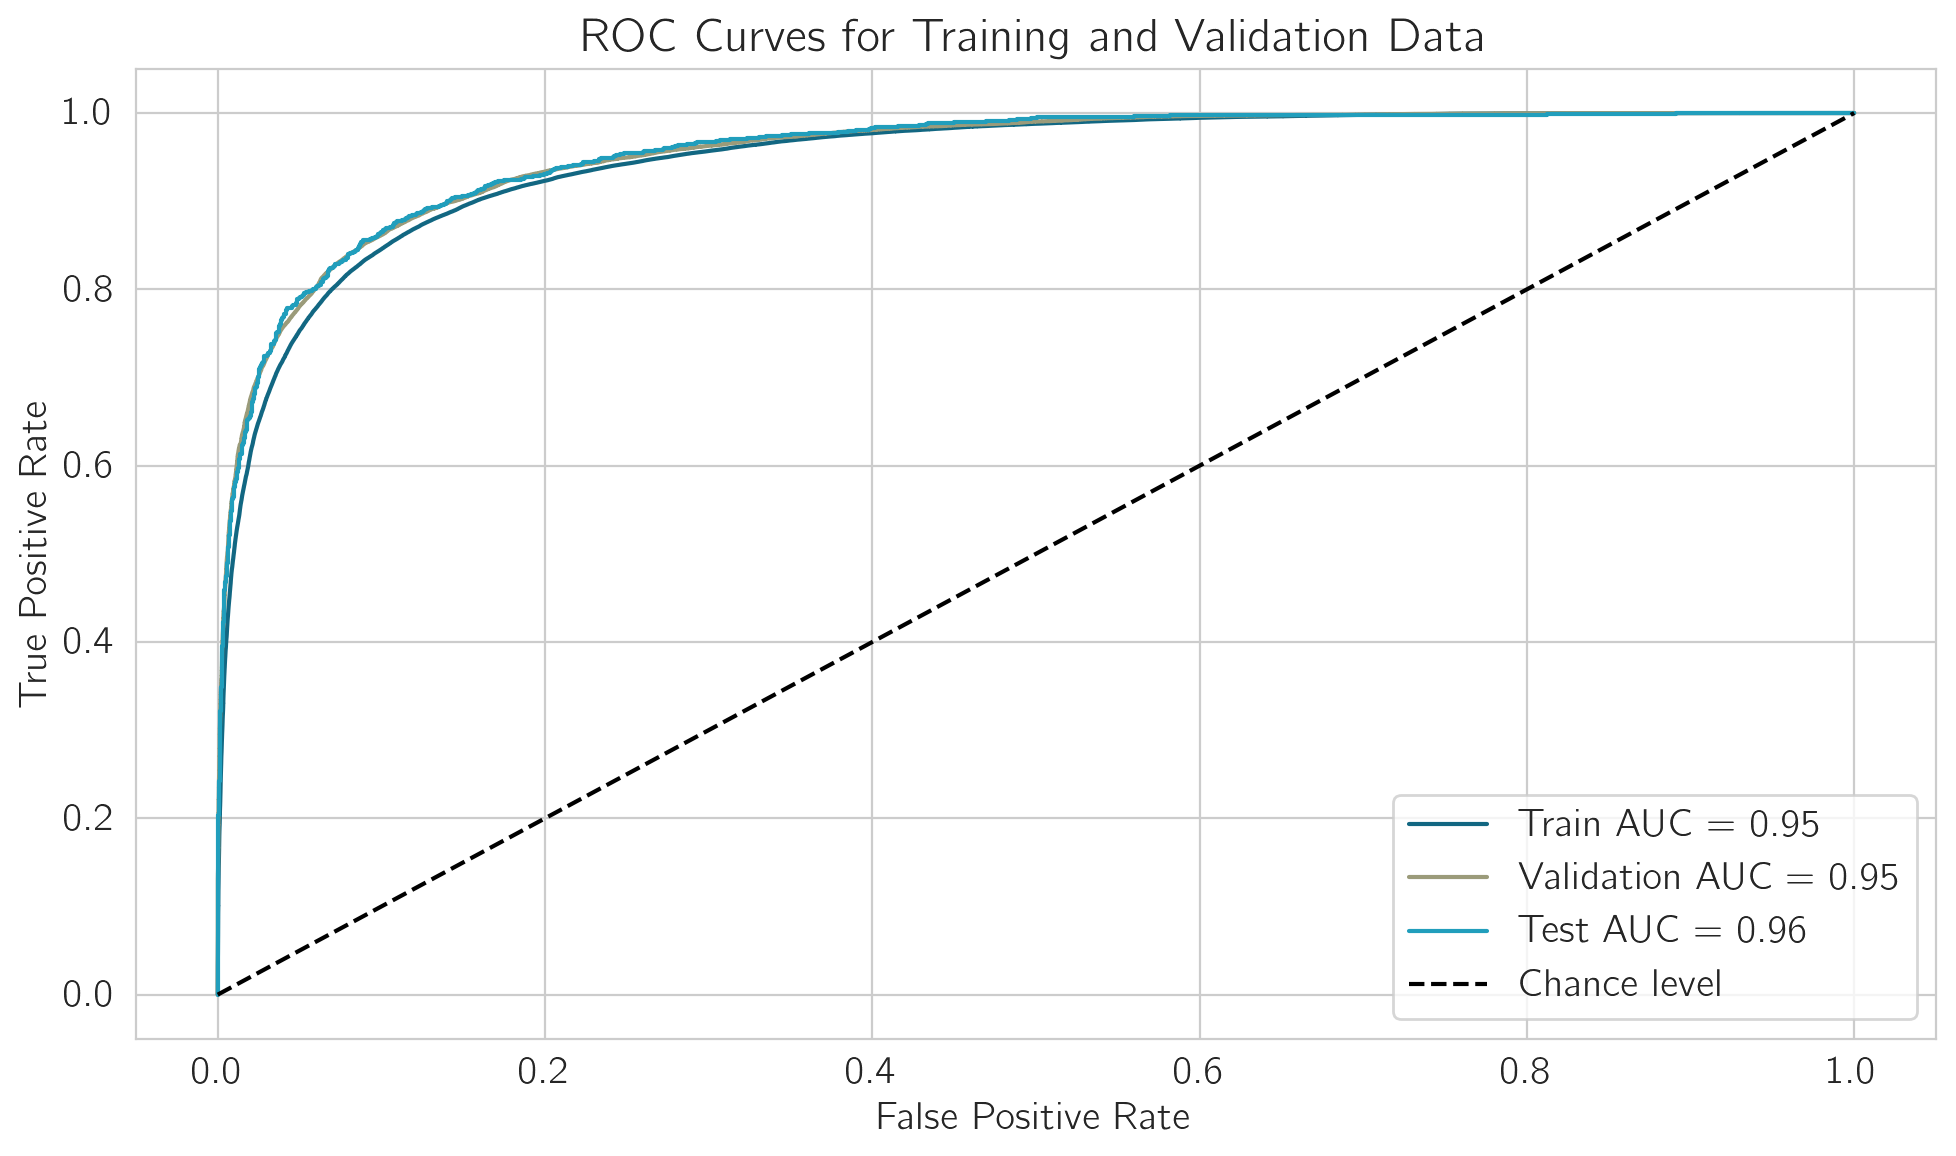

In [8]:
# ROC Curve and AUC
def plot_roc_curve_and_auc(train_data, val_data):
    fpr_train, tpr_train, _ = roc_curve(train_data['ground_truth'], train_data['ensemble_output'])
    auc_train = auc(fpr_train, tpr_train)
    fpr_val, tpr_val, _ = roc_curve(val_data['ground_truth'], val_data['ensemble_output'])
    auc_val = auc(fpr_val, tpr_val)
    
    fpr_test, tpr_test, _ = roc_curve(test_data['ground_truth'], test_data['ensemble_output'])
    auc_test = auc(fpr_test, tpr_test)
    
    plt.figure(figsize=(10, 6), dpi=200)
    sns.set_style('whitegrid')
    plt.plot(fpr_train, tpr_train, label=f'Train AUC = {auc_train:.2f}', color='#126782')
    plt.plot(fpr_val, tpr_val, label=f'Validation AUC = {auc_val:.2f}', color='#9b9b7a')
    plt.plot(fpr_test, tpr_test, label=f'Test AUC = {auc_test:.2f}', color='#219ebc')
    plt.plot([0, 1], [0, 1], 'k--', label='Chance level')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for Training and Validation Data')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('/Users/hardie/hep-wg/figs/roc-all-sets.png')
    plt.show()

plot_roc_curve_and_auc(train_data, val_data)

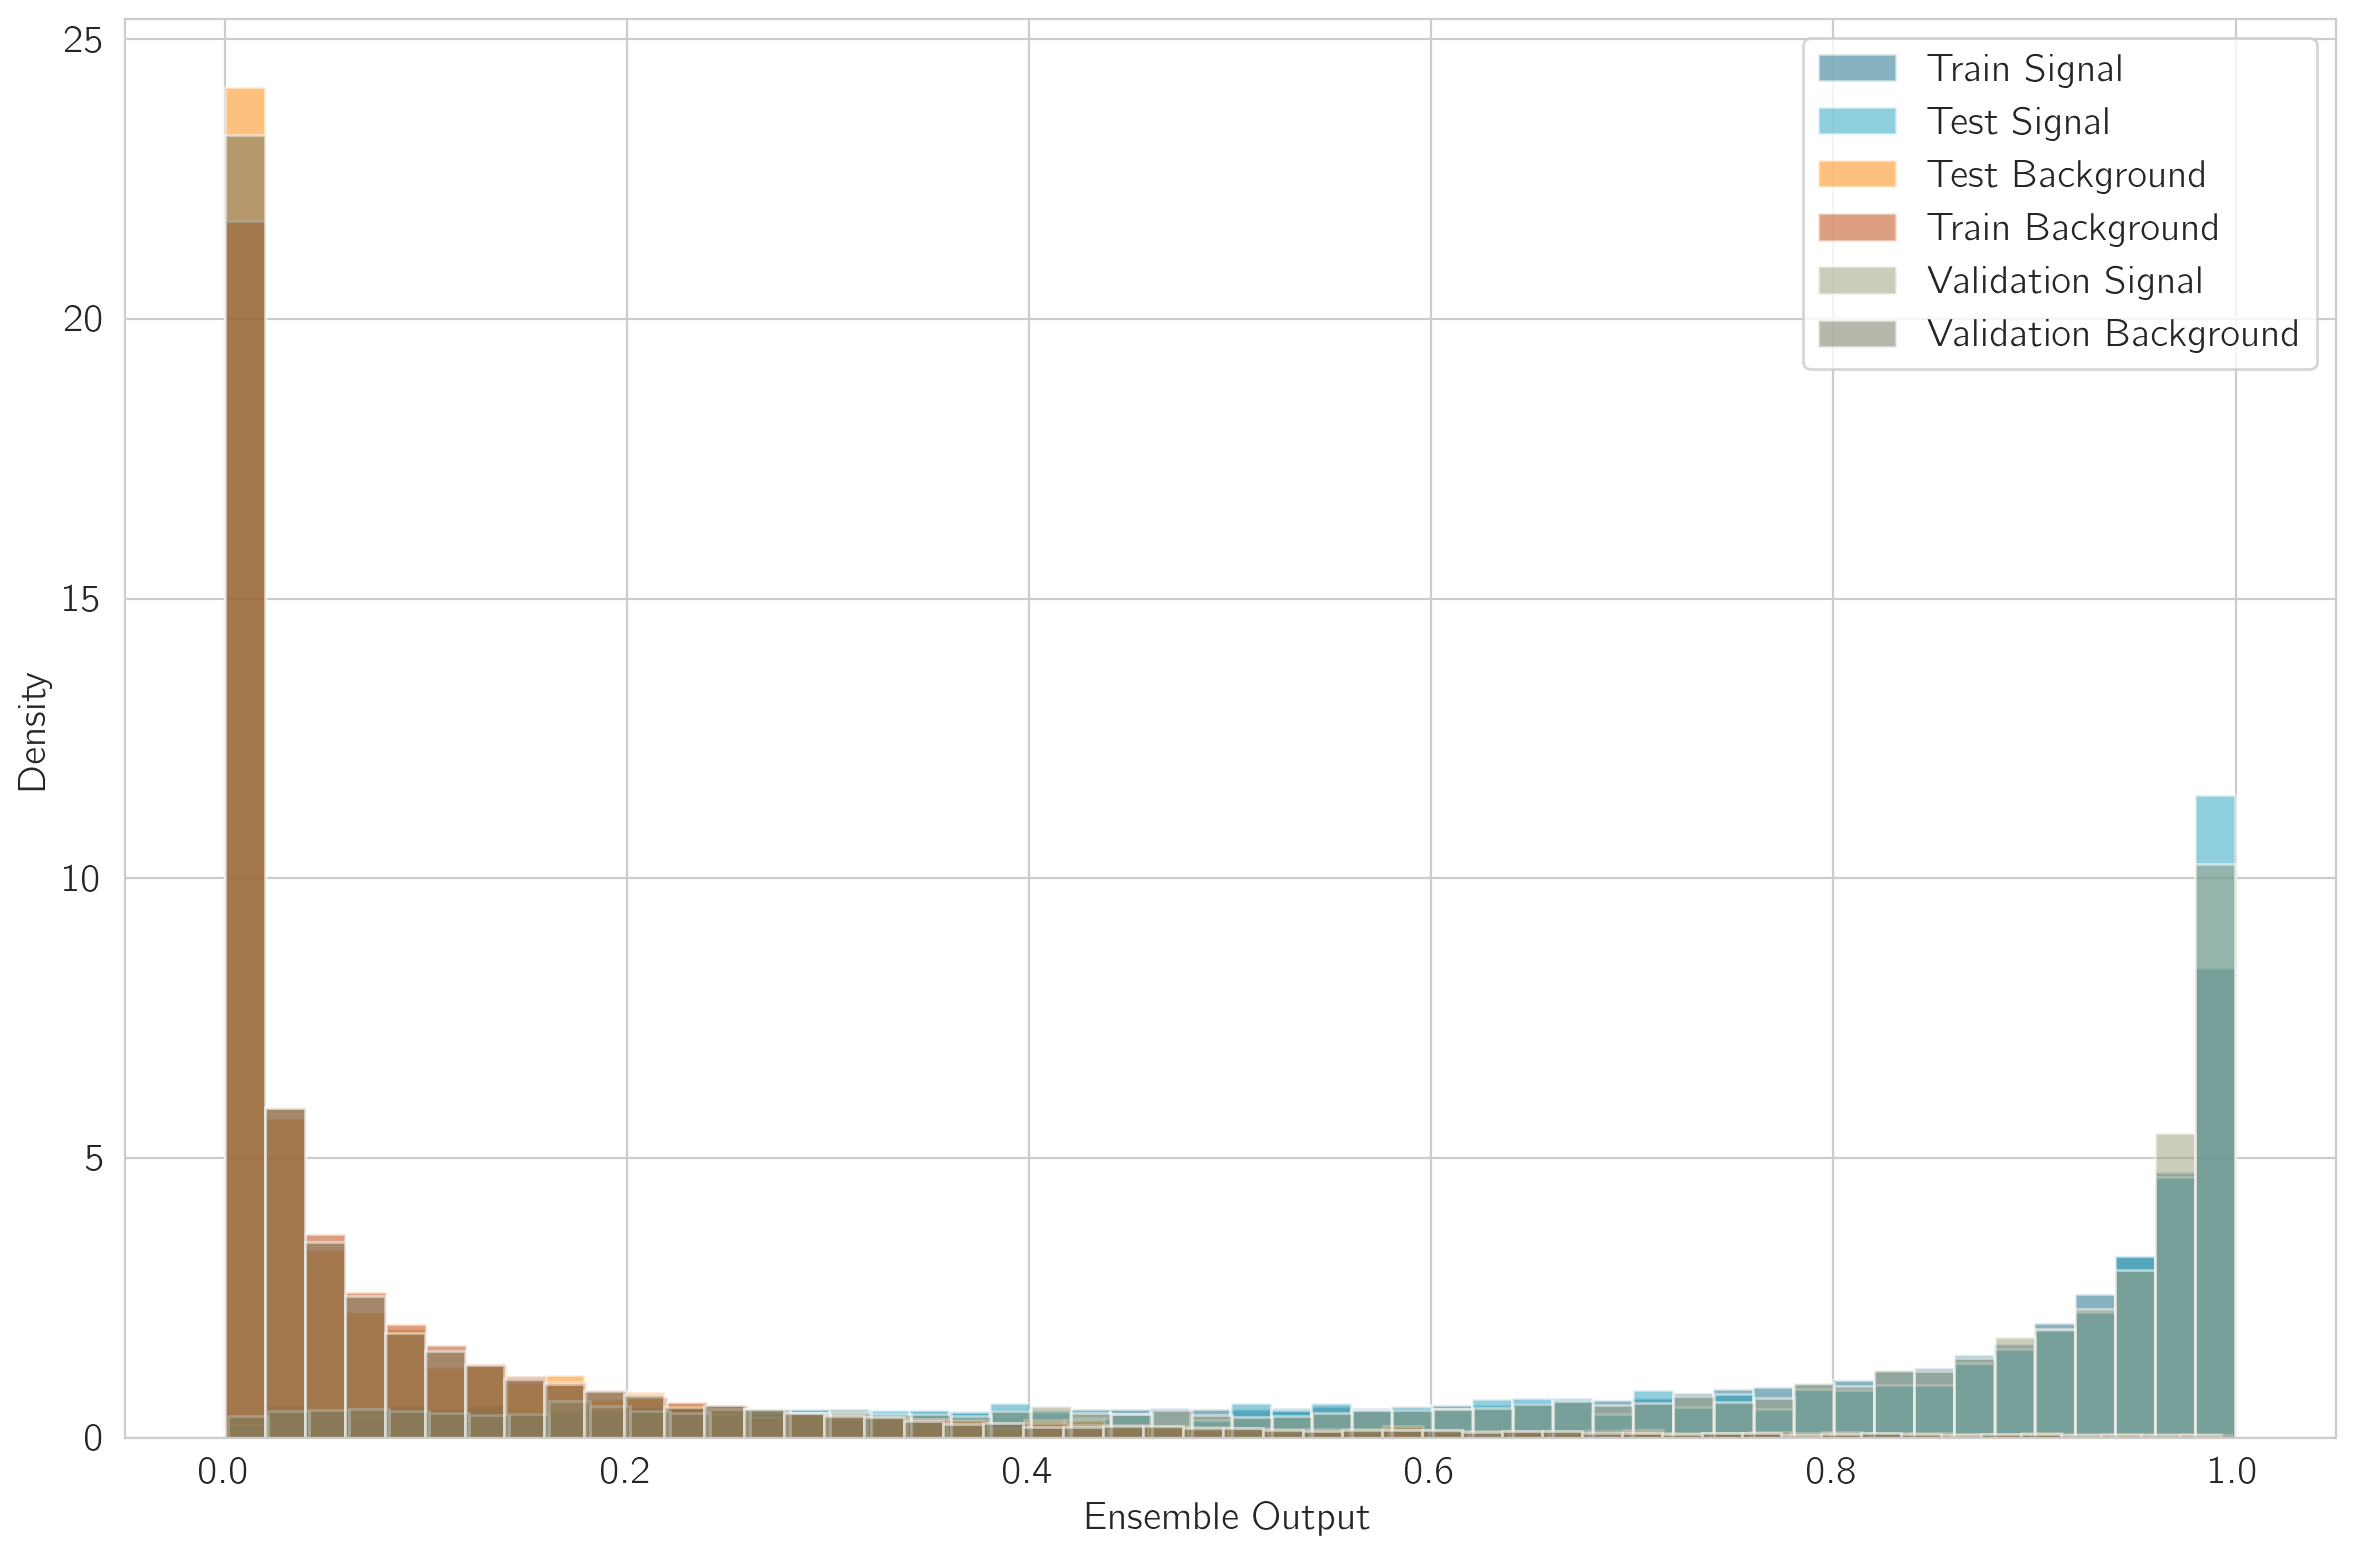

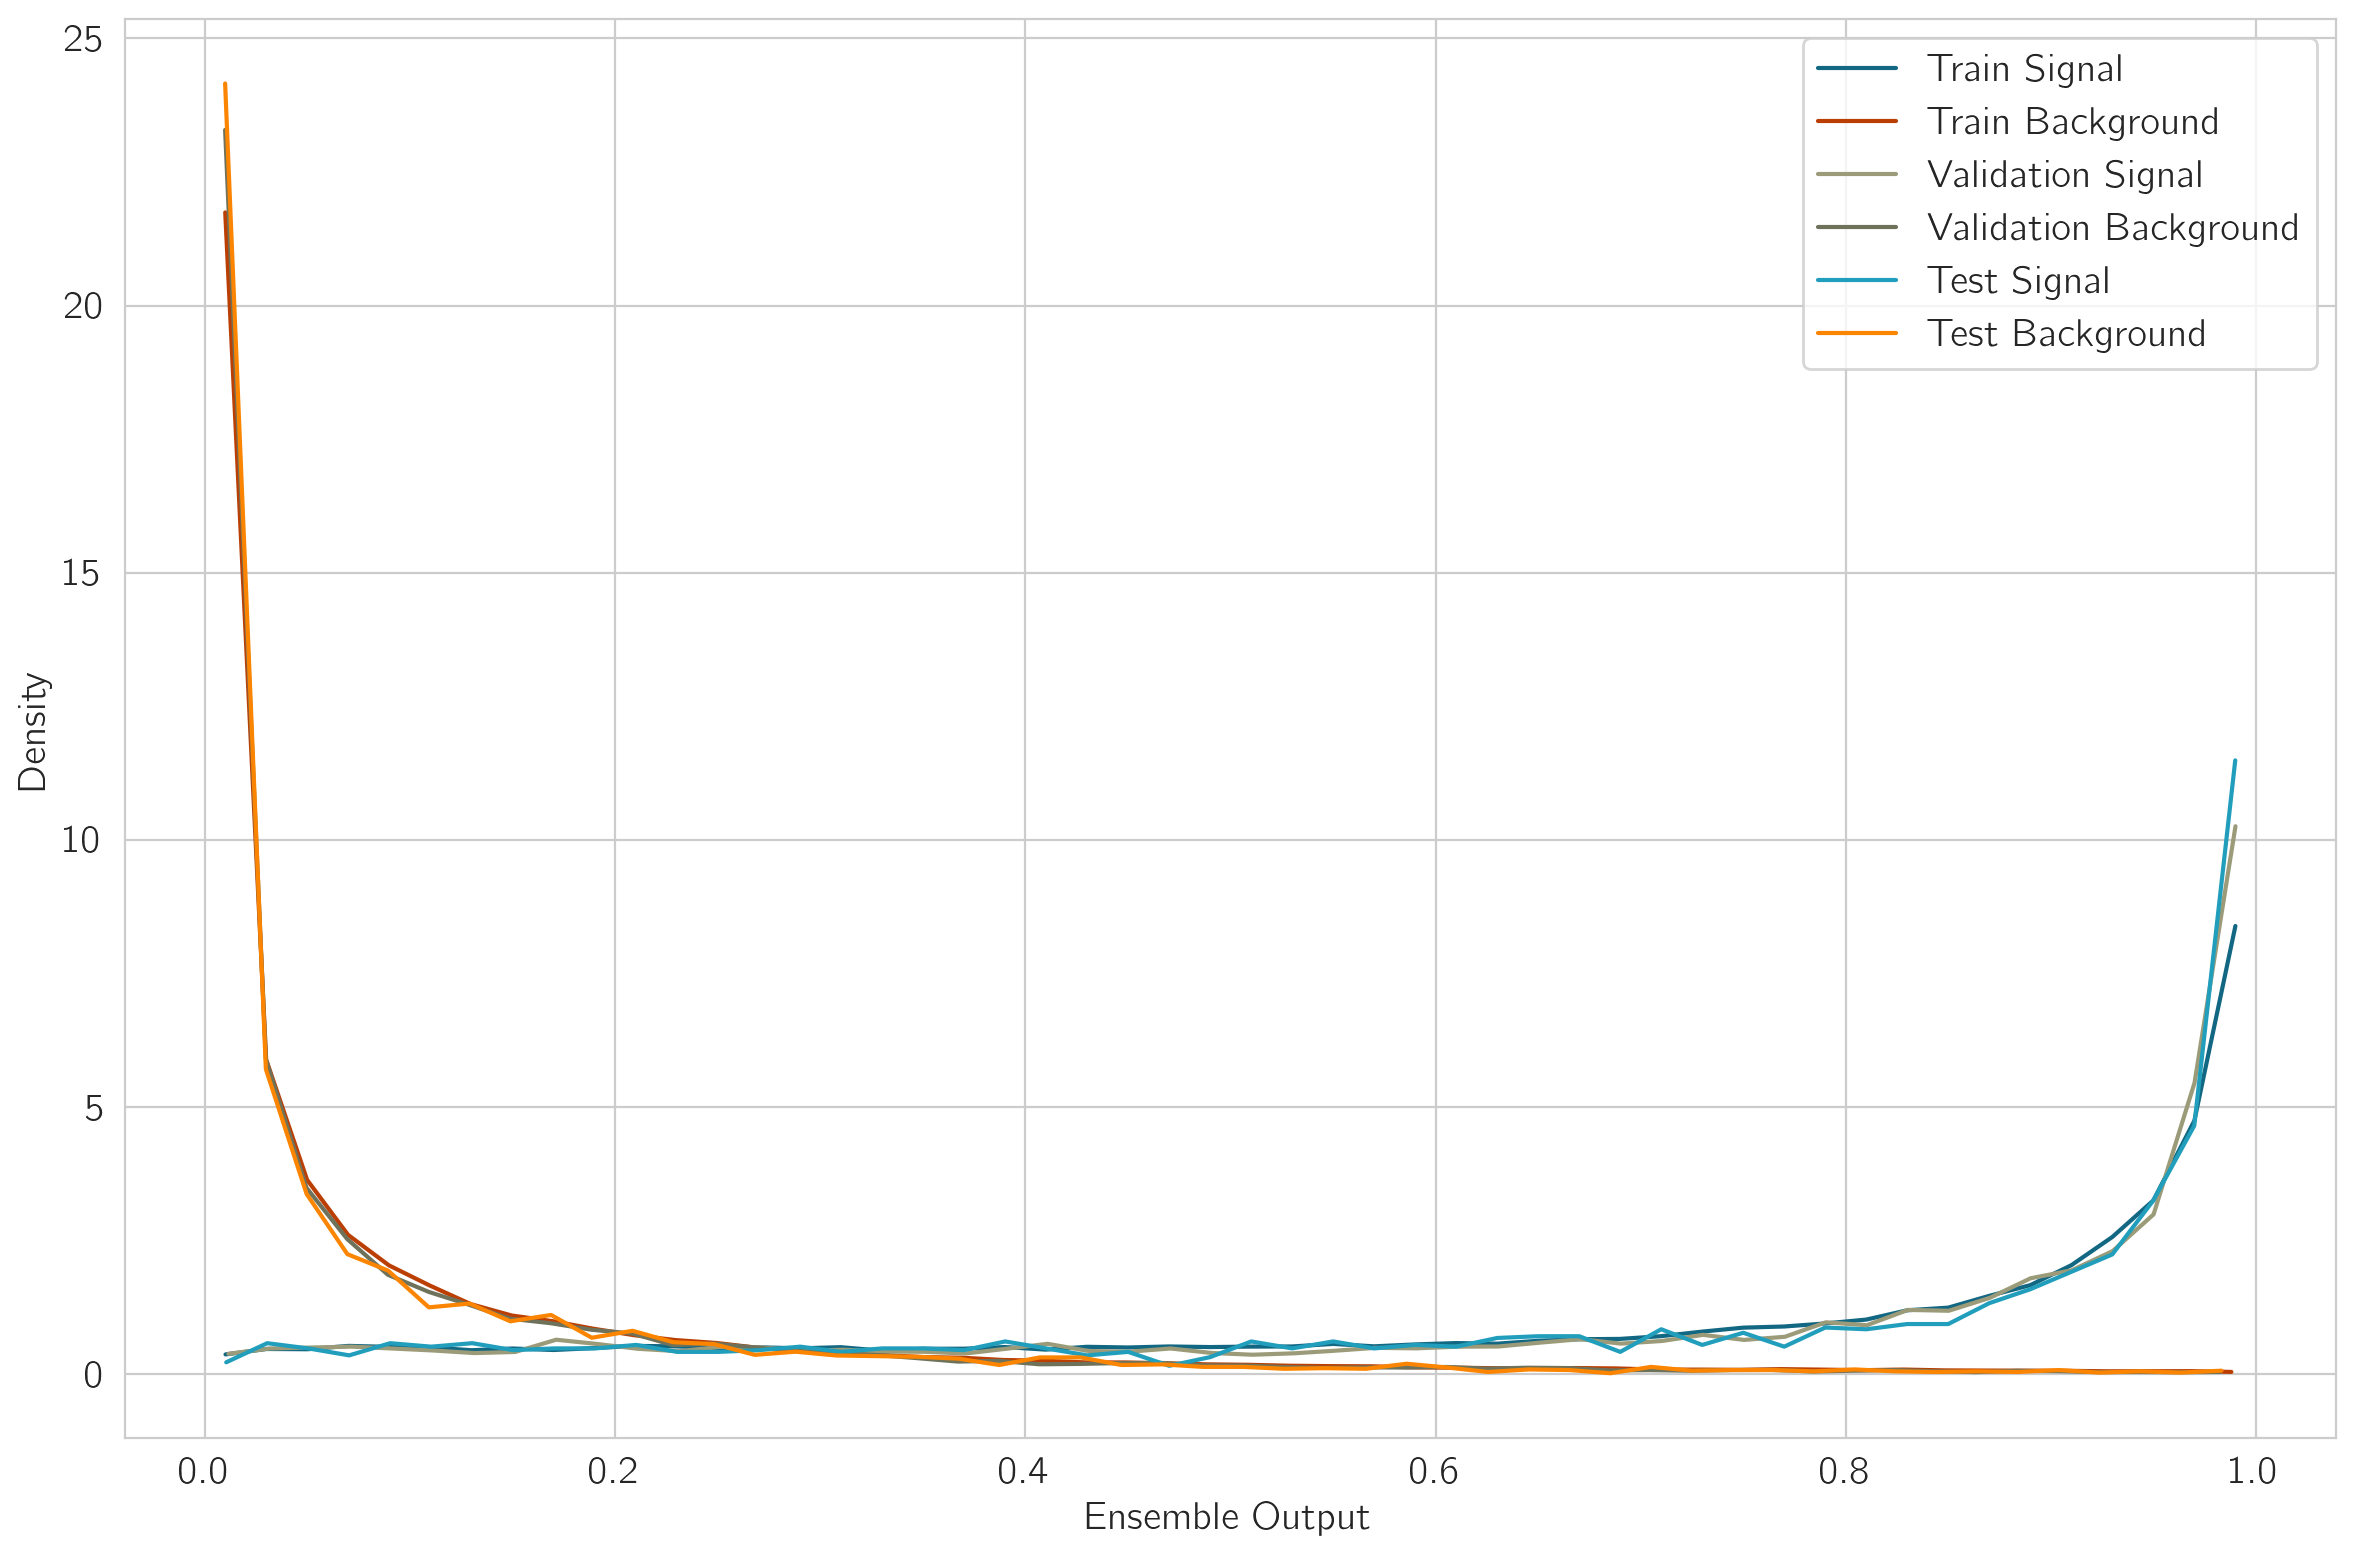

In [9]:
# Probability Distributions (Histograms and Line Plots)
def plot_probability_distributions(train_data, val_data):
    # Separating signal and background
    train_signal = train_data[train_data['ground_truth'] == 1]['ensemble_output']
    train_background = train_data[train_data['ground_truth'] == 0]['ensemble_output']
    val_signal = val_data[val_data['ground_truth'] == 1]['ensemble_output']
    val_background = val_data[val_data['ground_truth'] == 0]['ensemble_output']
    
    test_signal = test_data[test_data['ground_truth'] == 1]['ensemble_output']
    test_background = test_data[test_data['ground_truth'] == 0]['ensemble_output']
    
    # Histograms
    plt.figure(figsize=(12, 8), dpi=200)
    sns.set_style('whitegrid')
    plt.hist(train_signal, bins=50, alpha=0.5, label='Train Signal', color='#126782', density=True)
    plt.hist(test_signal, bins=50, alpha=0.5, label='Test Signal', color='#219ebc', density=True)
    plt.hist(test_background, bins=50, alpha=0.5, label='Test Background', color='#fb8500', density=True)
    plt.hist(train_background, bins=50, alpha=0.5, label='Train Background', color='#bb3e03', density=True)
    plt.hist(val_signal, bins=50, alpha=0.5, label='Validation Signal', color='#9b9b7a', density=True)
    plt.hist(val_background, bins=50, alpha=0.5, label='Validation Background', color='#6f725a', density=True)
    plt.xlabel('Ensemble Output')
    plt.ylabel('Density')
    # plt.title('Distribution of Outputs for Train and Validation Data (Histogram)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('/Users/hardie/hep-wg/figs/hist-gated-lf.png')
    plt.show()


    # Line Plots
    def density(data):
        counts, bins = np.histogram(data, bins=50, density=True)
        bin_centers = (bins[:-1] + bins[1:]) / 2
        return bin_centers, counts

    bin_centers_train_signal, density_train_signal = density(train_signal)
    bin_centers_train_background, density_train_background = density(train_background)
    bin_centers_val_signal, density_val_signal = density(val_signal)
    bin_centers_val_background, density_val_background = density(val_background)
    bin_centers_test_signal, density_test_signal = density(test_signal)
    bin_centers_test_background, density_test_background = density(test_background)

    plt.figure(figsize=(12, 8), dpi=200)
    
    sns.set_style('whitegrid')
    plt.plot(bin_centers_train_signal, density_train_signal, label='Train Signal', color='#126782')
    plt.plot(bin_centers_train_background, density_train_background, label='Train Background', color='#bb3e03')
    plt.plot(bin_centers_val_signal, density_val_signal, label='Validation Signal', color='#9b9b7a')
    plt.plot(bin_centers_val_background, density_val_background, label='Validation Background', color='#6f725a')
    plt.plot(bin_centers_test_signal, density_test_signal, label='Test Signal', color='#219ebc')
    plt.plot(bin_centers_test_background, density_test_background, label='Test Background', color='#fb8500')
    plt.xlabel('Ensemble Output')
    plt.ylabel('Density')
    # plt.title('Density of Outputs for Train and Validation Data (Line Plot)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('/Users/hardie/hep-wg/figs/density-gated-lf.png')
    plt.show()

plot_probability_distributions(train_data, val_data)

Training Data - Optimal Threshold: 0.38, Optimal F1 Score: 0.8066855441075145
Validation Data - Optimal Threshold: 0.39, Optimal F1 Score: 0.8208943175255683
Testing Data - Optimal Threshold: 0.49, Optimal F1 Score: 0.8210237031947785


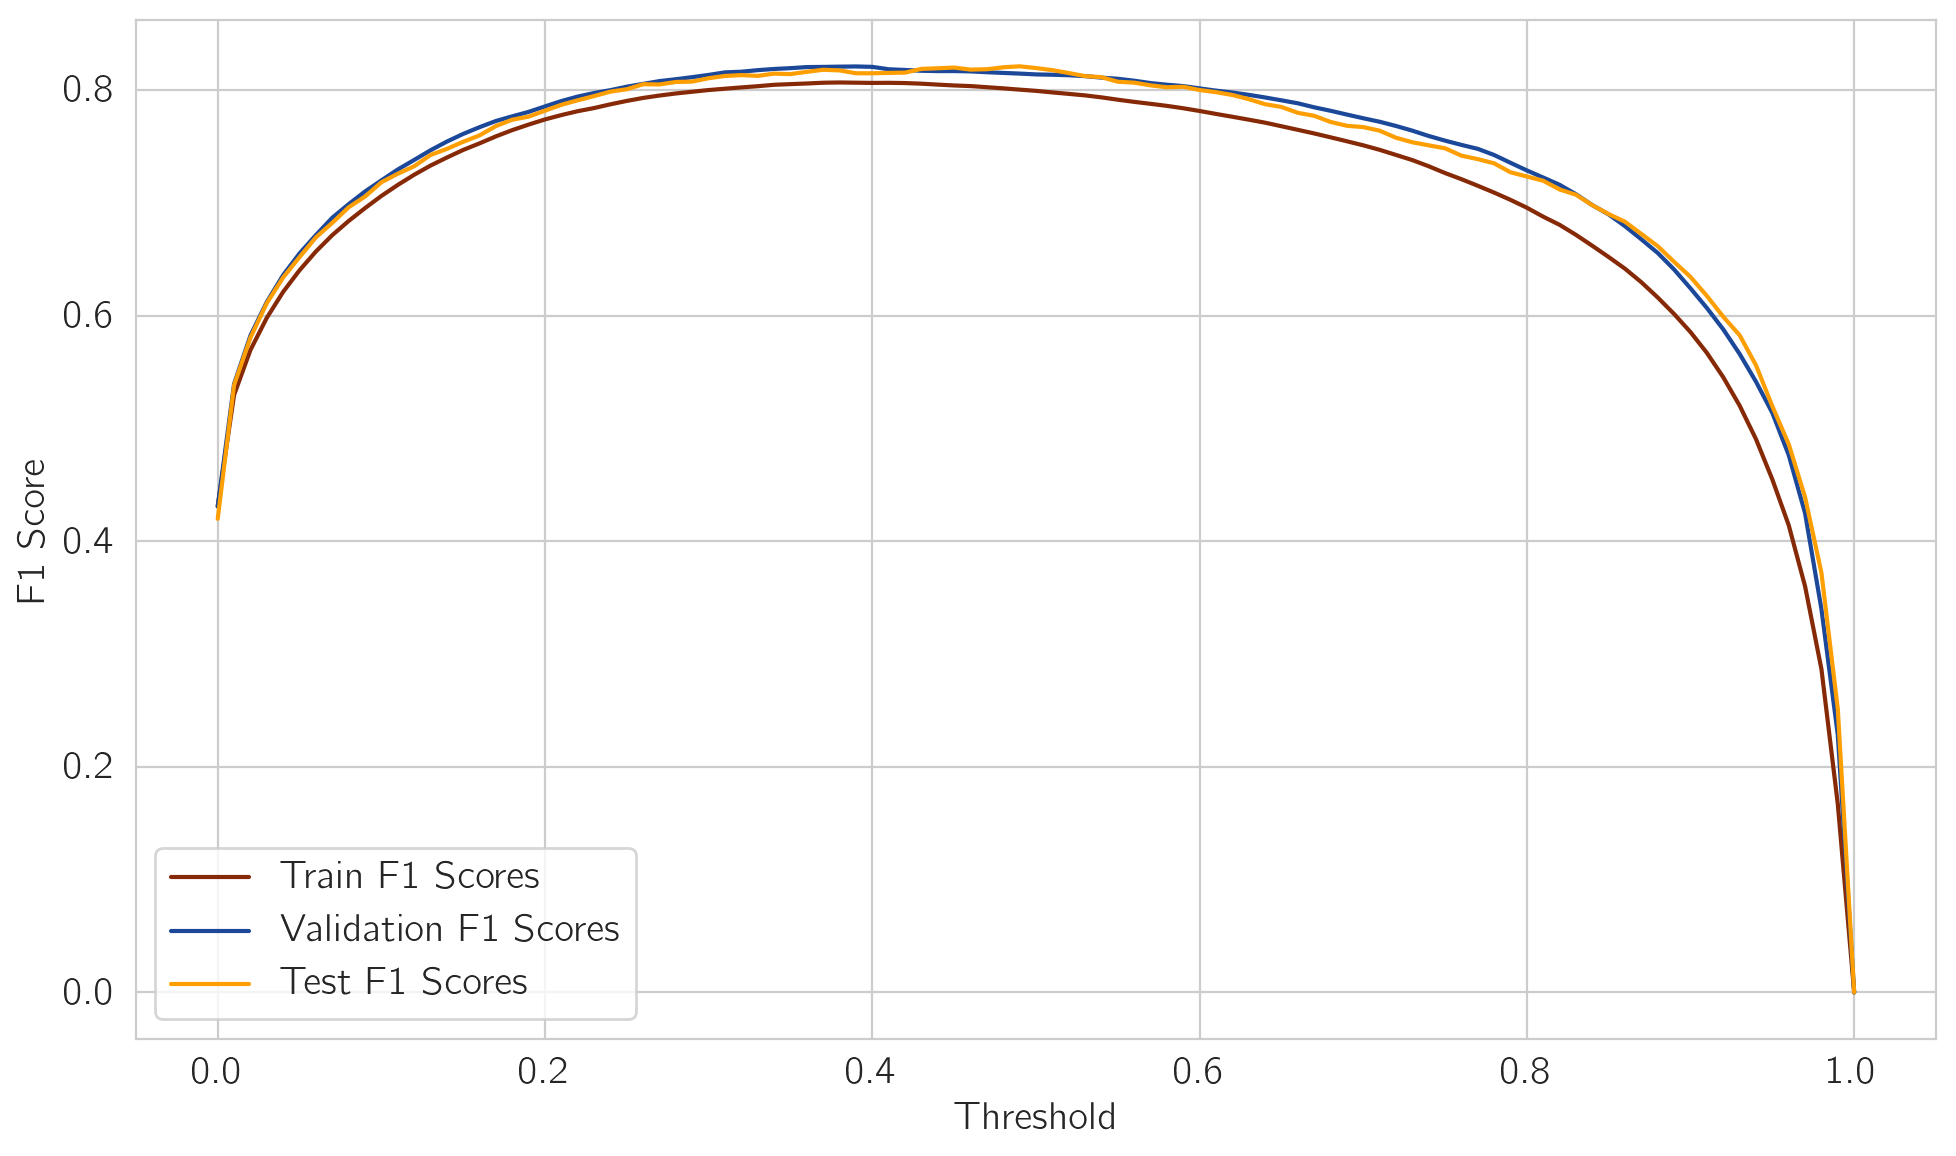

In [10]:
def compute_optimal_threshold(y_true, y_scores):
    thresholds = np.linspace(0, 1, 101)  # Define thresholds from 0 to 1
    f1_scores = []  # To store F1 scores for each threshold
    
    # Compute F1 score for each threshold
    for threshold in thresholds:
        y_pred = (y_scores >= threshold).astype(int)  # Convert probabilities to binary predictions
        score = f1_score(y_true, y_pred)
        f1_scores.append(score)
    
    # Find the optimal threshold and its corresponding F1 score
    optimal_index = np.argmax(f1_scores)
    optimal_threshold = thresholds[optimal_index]
    optimal_f1_score = f1_scores[optimal_index]
    
    return optimal_threshold, optimal_f1_score, thresholds, f1_scores

# Assuming you have loaded your datasets into train_data and val_data
# And 'ground_truth' is the column with true labels
# And 'ensemble_output' is the column with predicted probabilities

# Compute for training data
optimal_threshold_train, optimal_f1_score_train, thresholds_train, f1_scores_train = compute_optimal_threshold(
    train_data['ground_truth'], train_data['ensemble_output'])

# Compute for validation data
optimal_threshold_val, optimal_f1_score_val, thresholds_val, f1_scores_val = compute_optimal_threshold(
    val_data['ground_truth'], val_data['ensemble_output'])

optimal_threshold_test, optimal_f1_score_test, thresholds_test, f1_scores_test = compute_optimal_threshold(
    test_data['ground_truth'], test_data['ensemble_output'])

print(f"Training Data - Optimal Threshold: {optimal_threshold_train}, Optimal F1 Score: {optimal_f1_score_train}")
print(f"Validation Data - Optimal Threshold: {optimal_threshold_val}, Optimal F1 Score: {optimal_f1_score_val}")
print(f"Testing Data - Optimal Threshold: {optimal_threshold_test}, Optimal F1 Score: {optimal_f1_score_test}")

# Optionally, you can plot the F1 scores over thresholds to visually inspect
plt.figure(figsize=(10, 6), dpi=200)
sns.set_style('whitegrid')
plt.plot(thresholds_train, f1_scores_train, label='Train F1 Scores', color='#862906')
plt.plot(thresholds_val, f1_scores_val, label='Validation F1 Scores', color='#1c489a')
plt.plot(thresholds_test, f1_scores_test, label='Test F1 Scores', color='#fd9e02')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
# plt.title('F1 Score by Threshold for Training and Validation Data')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('/Users/hardie/hep-wg/figs/f1-vs-threshold.png')
plt.show()


In [11]:
def compute_metrics(y_true, y_scores):
    thresholds = np.linspace(0, 1, 101)
    metrics = []

    for threshold in thresholds:
        y_pred = (y_scores >= threshold).astype(int)
        
        TN, FP, FN, TP = confusion_matrix(y_true, y_pred).ravel()
        
        Accuracy = accuracy_score(y_true, y_pred)
        Recall = recall_score(y_true, y_pred)  # Also known as TPR or Signal Efficiency
        
        # Check if TP + FP is zero (no positive predictions)
        if TP + FP == 0:
            Precision = 0  # Or use another policy for zero_division
        else:
            Precision = TP / (TP + FP)
        
        # Compute F1 score manually to handle division by zero
        if (Precision + Recall) == 0:
            F1 = 0
        else:
            F1 = 2 * (Precision * Recall) / (Precision + Recall)
        
        TNR = TN / (TN + FP) if (TN + FP) > 0 else 0
        
        metrics.append([threshold, TP, FN, TN, FP, Accuracy, F1, Recall, TNR])
        
    columns = ['Threshold', 'True Positive', 'False Negative', 'True Negative', 'False Positive',
               'Accuracy', 'F1 Score', 'Signal Efficiency (Recall)', 'Background Rejection (TNR)']
    return pd.DataFrame(metrics, columns=columns)


In [12]:

# Compute metrics for training data
metrics_train = compute_metrics(train_data['ground_truth'], train_data['ensemble_output'])

# Compute metrics for validation data
metrics_val = compute_metrics(val_data['ground_truth'], val_data['ensemble_output'])

metrics_test = compute_metrics(test_data['ground_truth'], test_data['ensemble_output'])

# Now you have 'metrics_train' and 'metrics_val' DataFrames with the metrics for each threshold


In [13]:
metrics_train.tail(30)

,Threshold,True Positive,False Negative,True Negative,False Positive,Accuracy,F1 Score,Signal Efficiency (Recall),Background Rejection (TNR)
71,0.71,272736,159608,1115870,25136,0.882579,0.747001,0.630831,0.977970
72,0.72,269503,162841,1116870,24136,0.881160,0.742450,0.623353,0.978847
73,0.73,266209,166135,1118008,22998,0.879790,0.737880,0.615734,0.979844
74,0.74,262563,169781,1118935,22071,0.878061,0.732416,0.607301,0.980657
75,0.75,258614,173730,1119909,21097,0.876171,0.726388,0.598167,0.981510
76,0.76,254984,177360,1120974,20032,0.874540,0.720945,0.589771,0.982444
77,0.77,251114,181230,1122146,18860,0.872825,0.715101,0.580820,0.983471
78,0.78,247215,185129,1123260,17746,0.871055,0.709058,0.571802,0.984447
79,0.79,243194,189150,1124298,16708,0.869159,0.702623,0.562501,0.985357
80,0.80,238959,193385,1125295,15711,0.867101,0.695645,0.552706,0.986231


In [21]:
metrics_test.tail(70)

,Threshold,True Positive,False Negative,True Negative,False Positive,Accuracy,F1 Score,Signal Efficiency (Recall),Background Rejection (TNR)
31,0.31,1315,222,3863,385,0.895073,0.812481,0.855563,0.909369
32,0.32,1304,233,3882,366,0.896456,0.813221,0.848406,0.913842
33,0.33,1296,241,3891,357,0.896629,0.812539,0.843201,0.915960
34,0.34,1289,248,3909,339,0.898531,0.814534,0.838647,0.920198
35,0.35,1281,256,3919,329,0.898876,0.814109,0.833442,0.922552
...,...,...,...,...,...,...,...,...,...
96,0.96,496,1041,4240,8,0.818669,0.486036,0.322707,0.998117
97,0.97,434,1103,4242,6,0.808297,0.439049,0.282368,0.998588
98,0.98,352,1185,4244,4,0.794468,0.371896,0.229018,0.999058
99,0.99,221,1316,4246,2,0.772169,0.251136,0.143787,0.999529


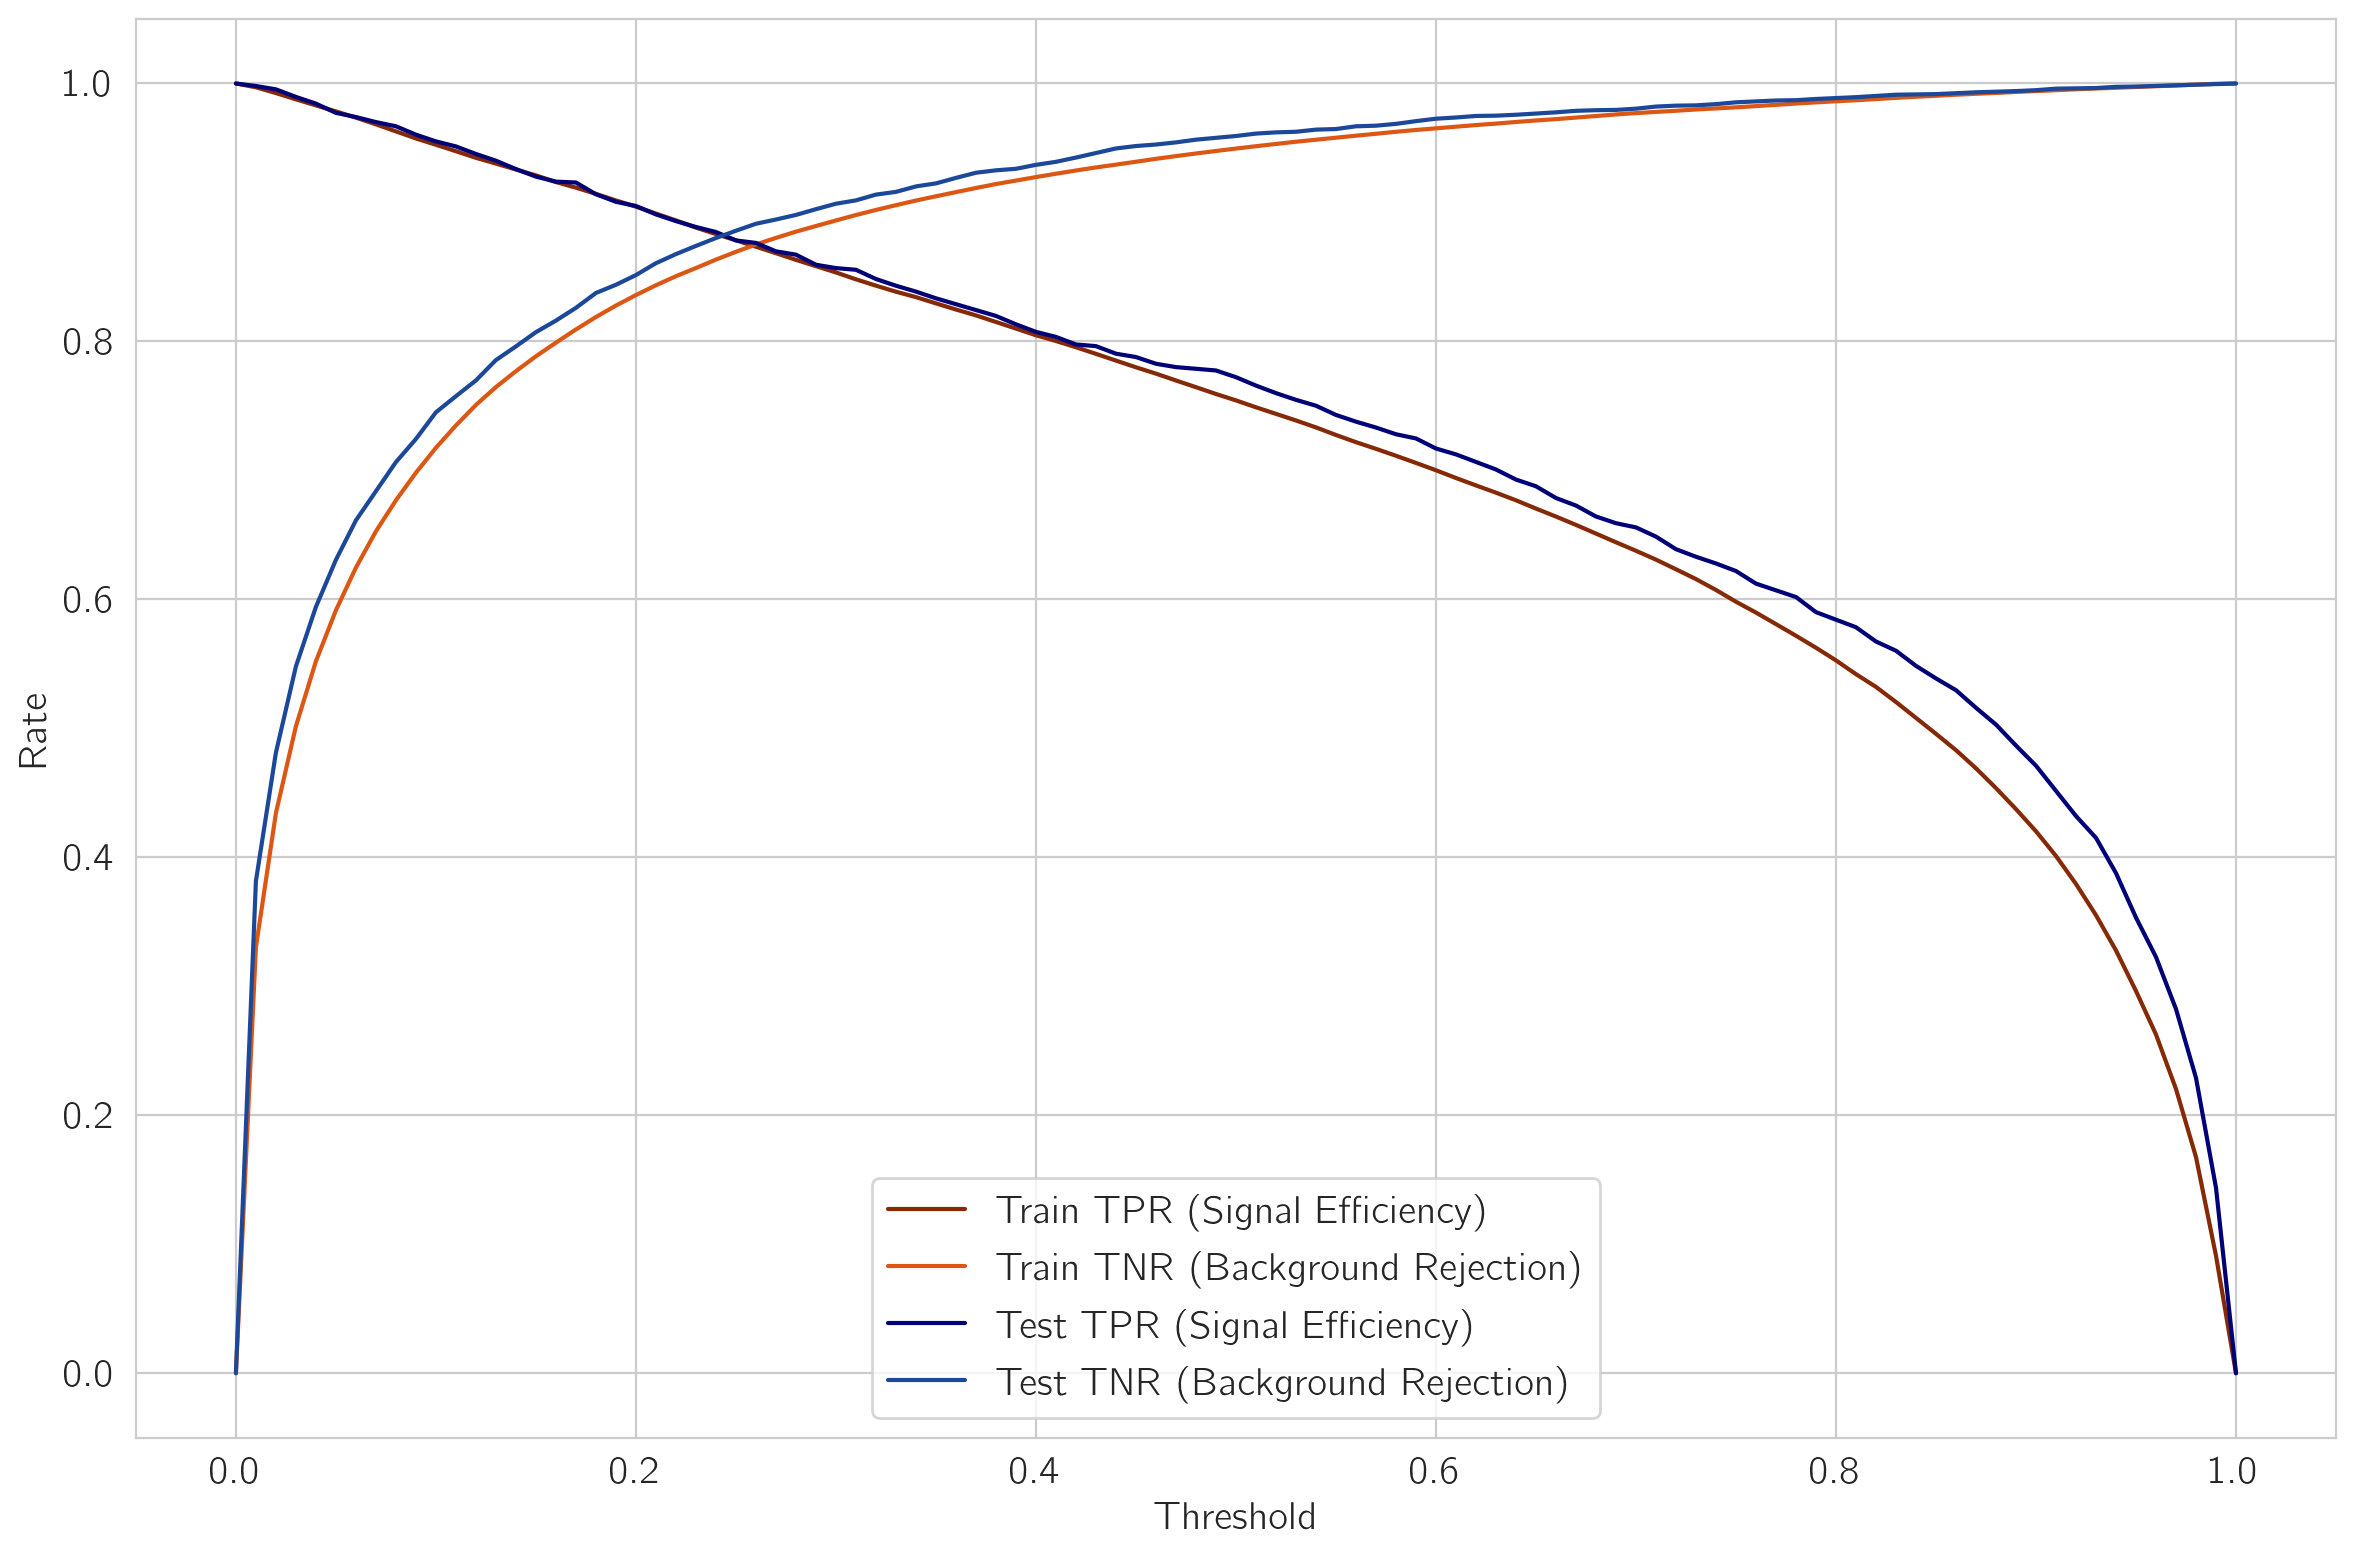

In [15]:
def plot_tpr_tnr(metrics_train, metrics_val):
    plt.figure(figsize=(12, 8), dpi=200)
    sns.set_style('whitegrid')
    # Plotting for training data
    plt.plot(metrics_train['Threshold'], metrics_train['Signal Efficiency (Recall)'], label='Train TPR (Signal Efficiency)', color='#862906')
    plt.plot(metrics_train['Threshold'], metrics_train['Background Rejection (TNR)'], label='Train TNR (Background Rejection)', color='#dc5713')
    
    # Plotting for validation data
    plt.plot(metrics_val['Threshold'], metrics_val['Signal Efficiency (Recall)'], label='Test TPR (Signal Efficiency)', color='#000077', linestyle='-')
    plt.plot(metrics_val['Threshold'], metrics_val['Background Rejection (TNR)'], label='Test TNR (Background Rejection)', color='#1c489a', linestyle='-')
    
    plt.xlabel('Threshold')
    plt.ylabel('Rate')
    # plt.title('TPR and TNR as a Function of Threshold for Training and Validation Data')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('/Users/hardie/hep-wg/figs/tpr-tnr-vs-threshold.png')
    plt.show()

# Assuming metrics_train and metrics_val are the DataFrames you obtained in the previous step
plot_tpr_tnr(metrics_train, metrics_test)


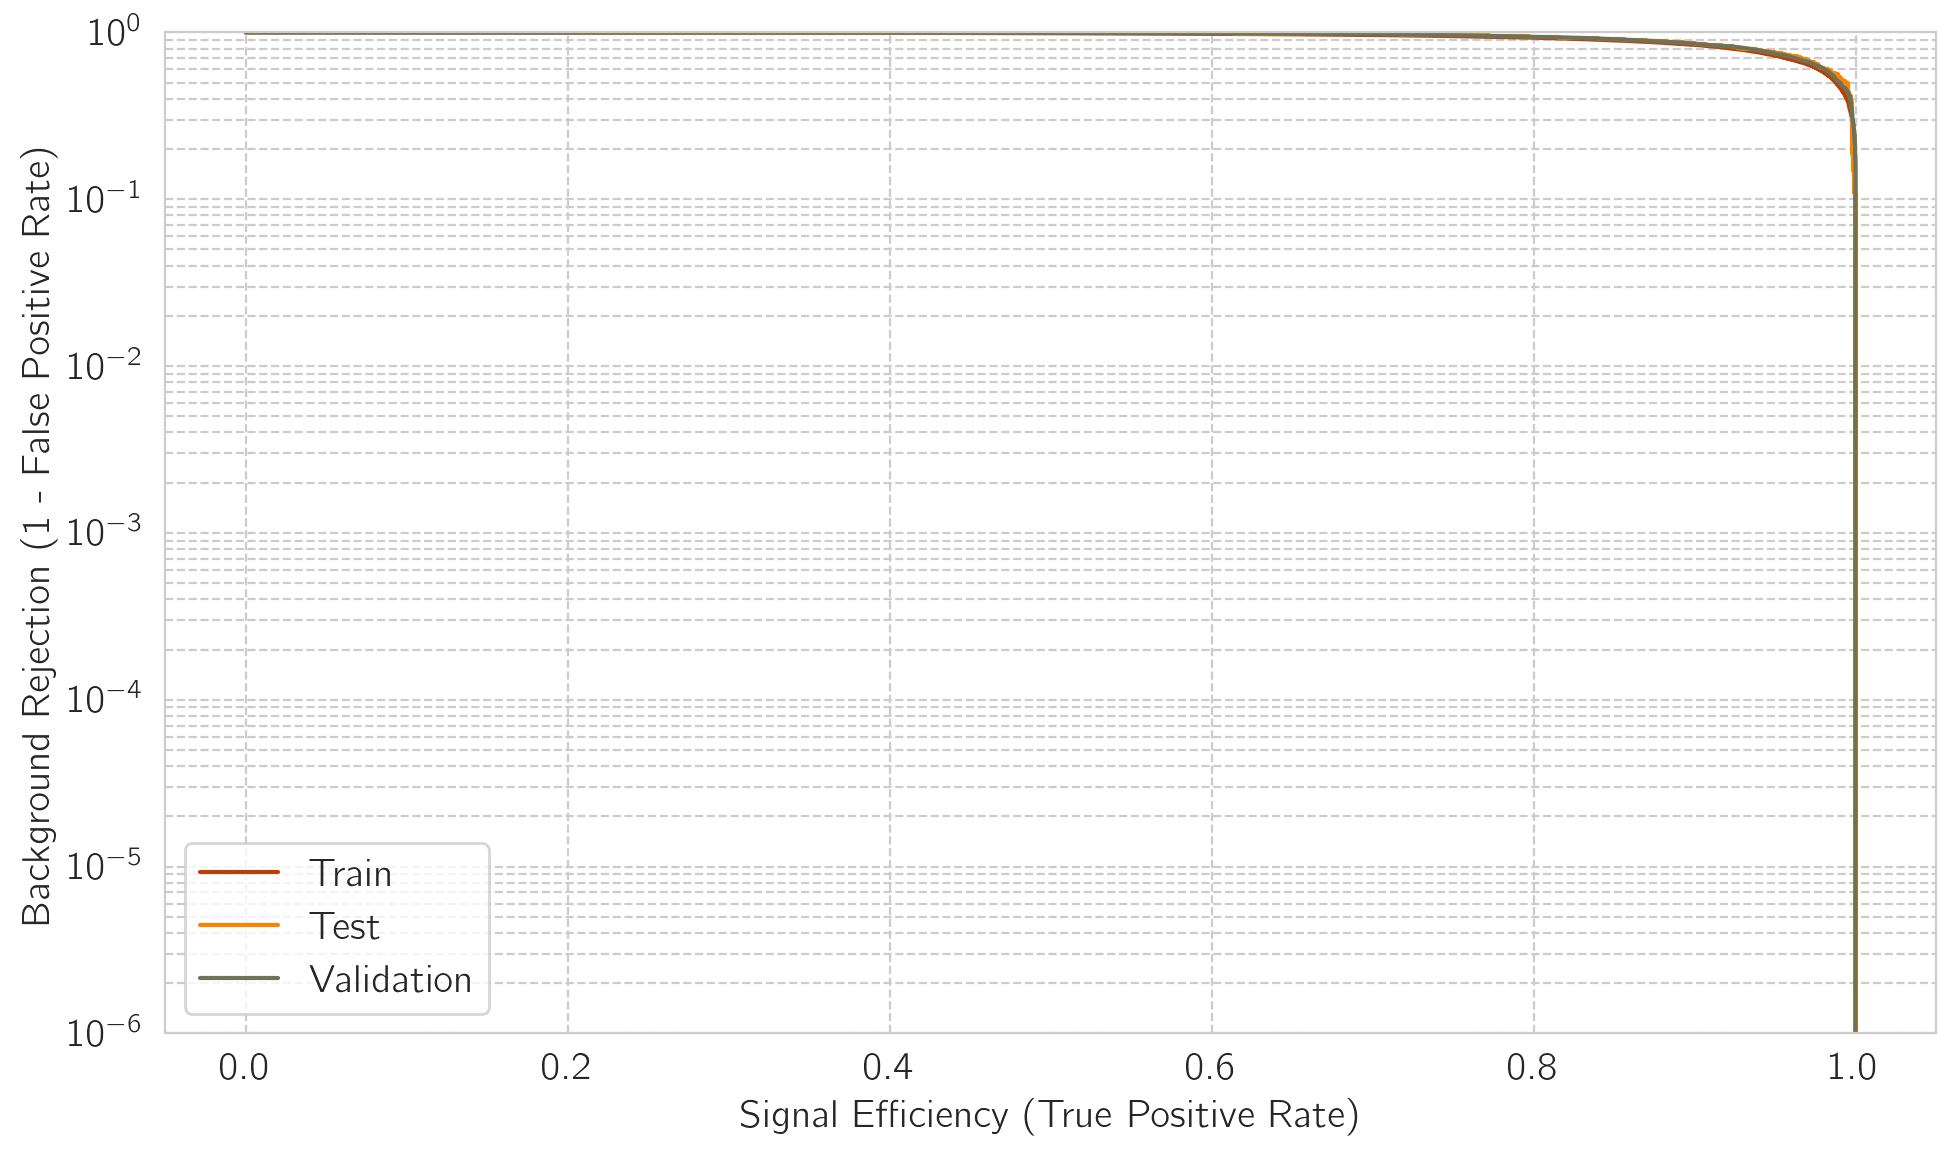

In [16]:

def plot_signal_vs_background_efficiency(train_data, val_data):
    # Calculate ROC curve and AUC for training data
    fpr_train, tpr_train, _ = roc_curve(train_data['ground_truth'], train_data['ensemble_output'])
    background_rejection_train = 1 - fpr_train  # Background Rejection for training data

    # Calculate ROC curve and AUC for validation data
    fpr_val, tpr_val, _ = roc_curve(val_data['ground_truth'], val_data['ensemble_output'])
    background_rejection_val = 1 - fpr_val  # Background Rejection for validation data
    
    fpr_test, tpr_test, _ = roc_curve(test_data['ground_truth'], test_data['ensemble_output'])
    background_rejection_test = 1 - fpr_test  # Background Rejection for training data


    plt.figure(figsize=(10, 6), dpi=200)
    sns.set_style('whitegrid')
    # Plotting for training data
    plt.plot(tpr_train, background_rejection_train, label='Train', color='#bb3e03')
    plt.plot(tpr_test, background_rejection_test, label='Test', color='#fb8500')
    
    # Plotting for validation data
    plt.plot(tpr_val, background_rejection_val, label='Validation', color='#6f725a')

    plt.xscale('linear')
    plt.yscale('log')  # Set Y-axis to logarithmic scale

    # Setting the limits for Y-axis from 10^-6 to 1
    plt.ylim(1e-6, 1)

    plt.xlabel('Signal Efficiency (True Positive Rate)')
    plt.ylabel('Background Rejection (1 - False Positive Rate)')
    # plt.title('Signal Efficiency vs Background Rejection with Logarithmic Scale')
    plt.legend(loc='lower left')
    plt.grid(True, which="both", ls="--")  # Adding grid for both major and minor ticks
    plt.tight_layout()
    plt.savefig('/Users/hardie/hep-wg/figs/br-vs-se.png')
    plt.show()
plot_signal_vs_background_efficiency(train_data, val_data)

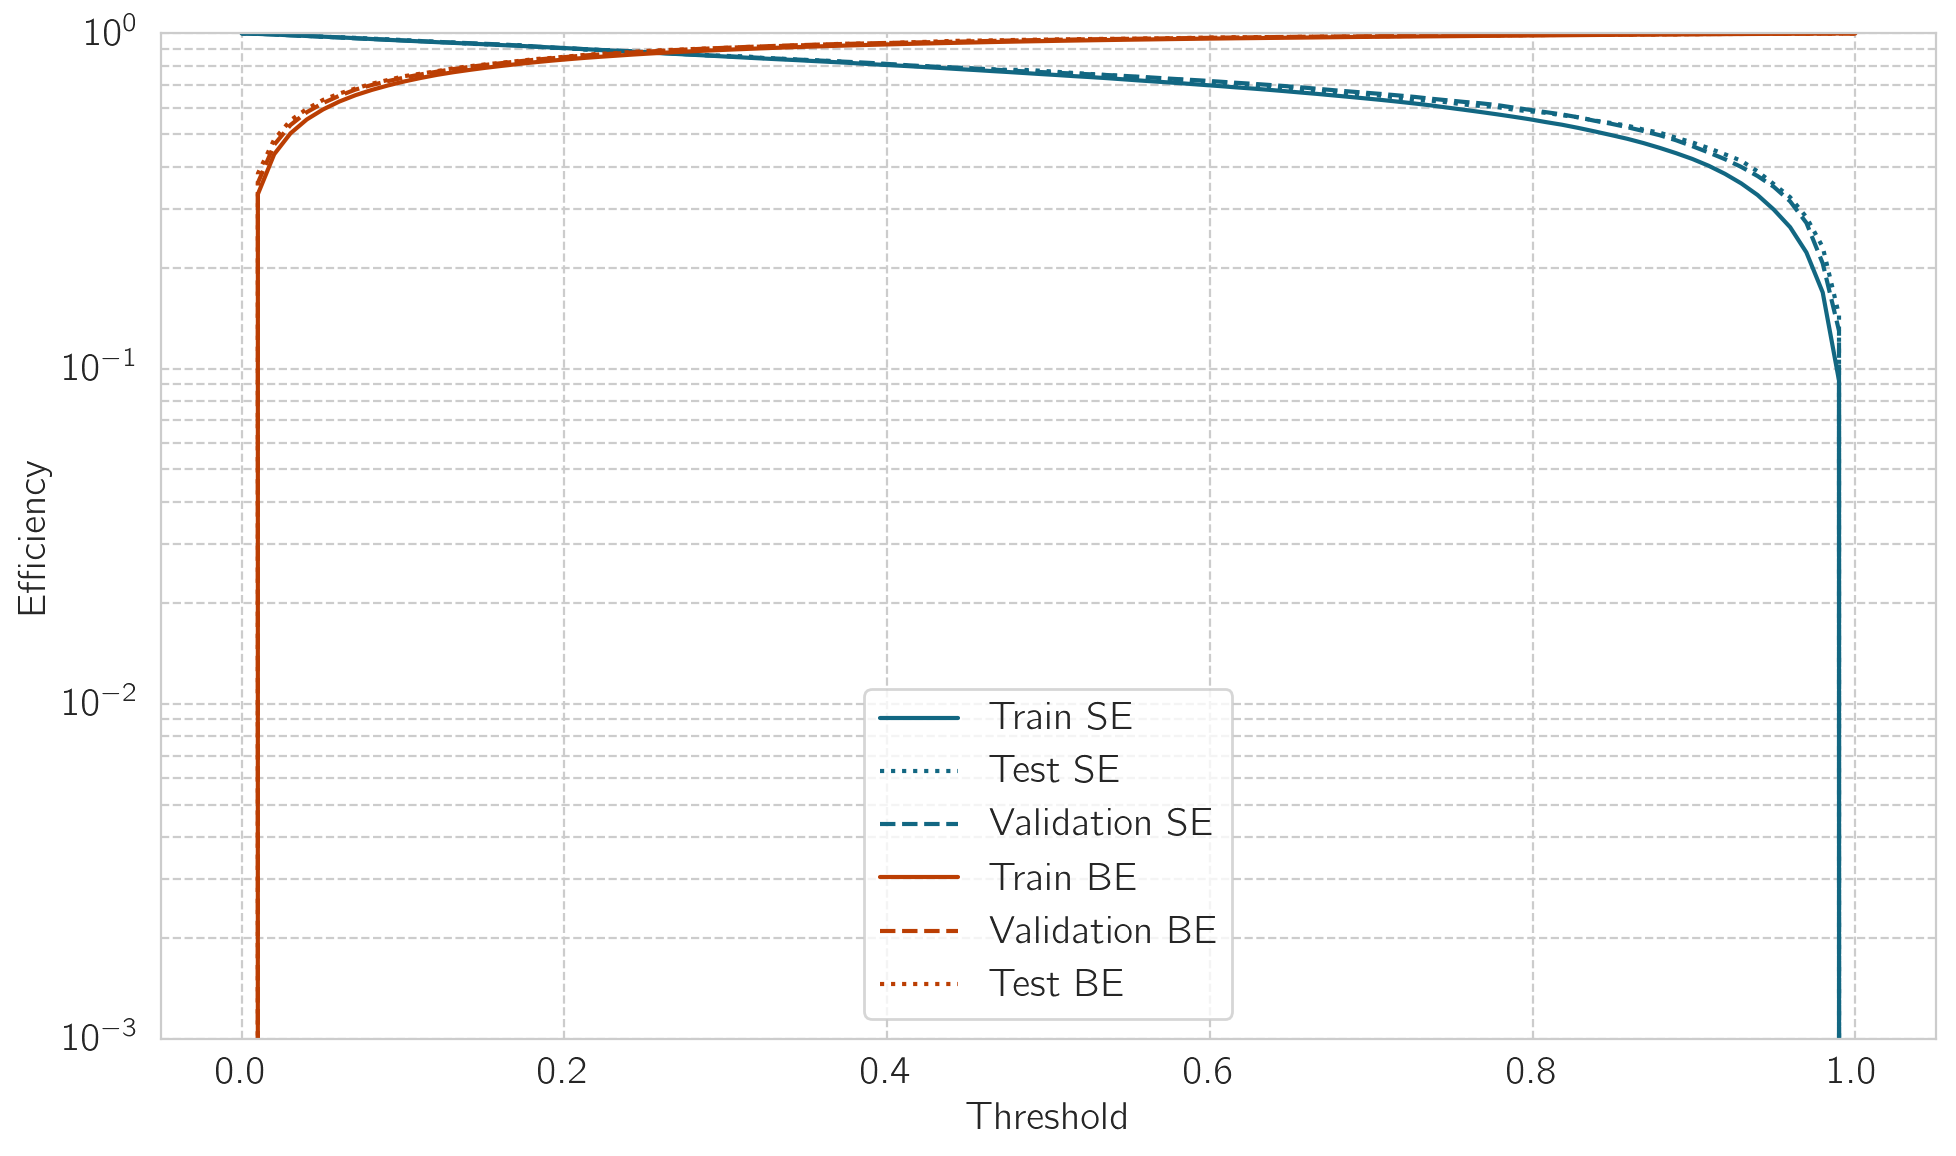

In [17]:

def plot_efficiencies_vs_threshold(train_data, val_data):
    thresholds = np.linspace(0, 1, 100)
    
    # Initialize lists to store efficiencies
    se_train, be_train = [], []
    se_test, be_test = [], []
    se_val, be_val = [], []

    for threshold in thresholds:
        # Calculate efficiencies for training data
        tp_train = ((train_data['ensemble_output'] >= threshold) & (train_data['ground_truth'] == 1)).sum()
        fn_train = ((train_data['ensemble_output'] < threshold) & (train_data['ground_truth'] == 1)).sum()
        tn_train = ((train_data['ensemble_output'] < threshold) & (train_data['ground_truth'] == 0)).sum()
        fp_train = ((train_data['ensemble_output'] >= threshold) & (train_data['ground_truth'] == 0)).sum()

        # Calculate Signal Efficiency and Background Efficiency for training data
        se_train.append(tp_train / (tp_train + fn_train) if (tp_train + fn_train) > 0 else 0)
        be_train.append(tn_train / (tn_train + fp_train) if (tn_train + fp_train) > 0 else 0)
        
        tp_test = ((test_data['ensemble_output'] >= threshold) & (test_data['ground_truth'] == 1)).sum()
        fn_test = ((test_data['ensemble_output'] < threshold) & (test_data['ground_truth'] == 1)).sum()
        tn_test = ((test_data['ensemble_output'] < threshold) & (test_data['ground_truth'] == 0)).sum()
        fp_test = ((test_data['ensemble_output'] >= threshold) & (test_data['ground_truth'] == 0)).sum()

        # Calculate Signal Efficiency and Background Efficiency for training data
        se_test.append(tp_test / (tp_test + fn_test) if (tp_test + fn_test) > 0 else 0)
        be_test.append(tn_test / (tn_test + fp_test) if (tn_test + fp_test) > 0 else 0)
        
        
        # Calculate efficiencies for validation data
        tp_val = ((val_data['ensemble_output'] >= threshold) & (val_data['ground_truth'] == 1)).sum()
        fn_val = ((val_data['ensemble_output'] < threshold) & (val_data['ground_truth'] == 1)).sum()
        tn_val = ((val_data['ensemble_output'] < threshold) & (val_data['ground_truth'] == 0)).sum()
        fp_val = ((val_data['ensemble_output'] >= threshold) & (val_data['ground_truth'] == 0)).sum()

        # Calculate Signal Efficiency and Background Efficiency for validation data
        se_val.append(tp_val / (tp_val + fn_val) if (tp_val + fn_val) > 0 else 0)
        be_val.append(tn_val / (tn_val + fp_val) if (tn_val + fp_val) > 0 else 0)

    plt.figure(figsize=(10, 6), dpi=200)
    sns.set_style('whitegrid')
    # Plotting Signal Efficiency for training and validation data
    plt.plot(thresholds, se_train, label='Train SE', color='#126782')
    plt.plot(thresholds, se_test, label='Test SE', color='#126782', linestyle='dotted')
    plt.plot(thresholds, se_val, label='Validation SE', color='#126782', linestyle='--')

    # Plotting Background Efficiency for training and validation data
    plt.plot(thresholds, be_train, label='Train BE', color='#bb3e03')
    plt.plot(thresholds, be_val, label='Validation BE', color='#bb3e03', linestyle='--')
    plt.plot(thresholds, be_test, label='Test BE', color='#bb3e03', linestyle='dotted')
    
    plt.xscale('linear')
    plt.yscale('log')  # Set Y-axis to logarithmic scale

    # Setting the limits for Y-axis to show the range more clearly
    plt.ylim(1e-3, 1)  # Adjust this range based on your actual data values

    plt.xlabel('Threshold')
    plt.ylabel('Efficiency')
    # plt.title('Signal and Background Efficiencies vs. Threshold')
    plt.legend(loc='best')
    plt.grid(True, which="both", ls="--")
    plt.tight_layout()
    plt.savefig('/Users/hardie/hep-wg/figs/se-and-be-vs-threshold.png')
    plt.show()
plot_efficiencies_vs_threshold(train_data, val_data)

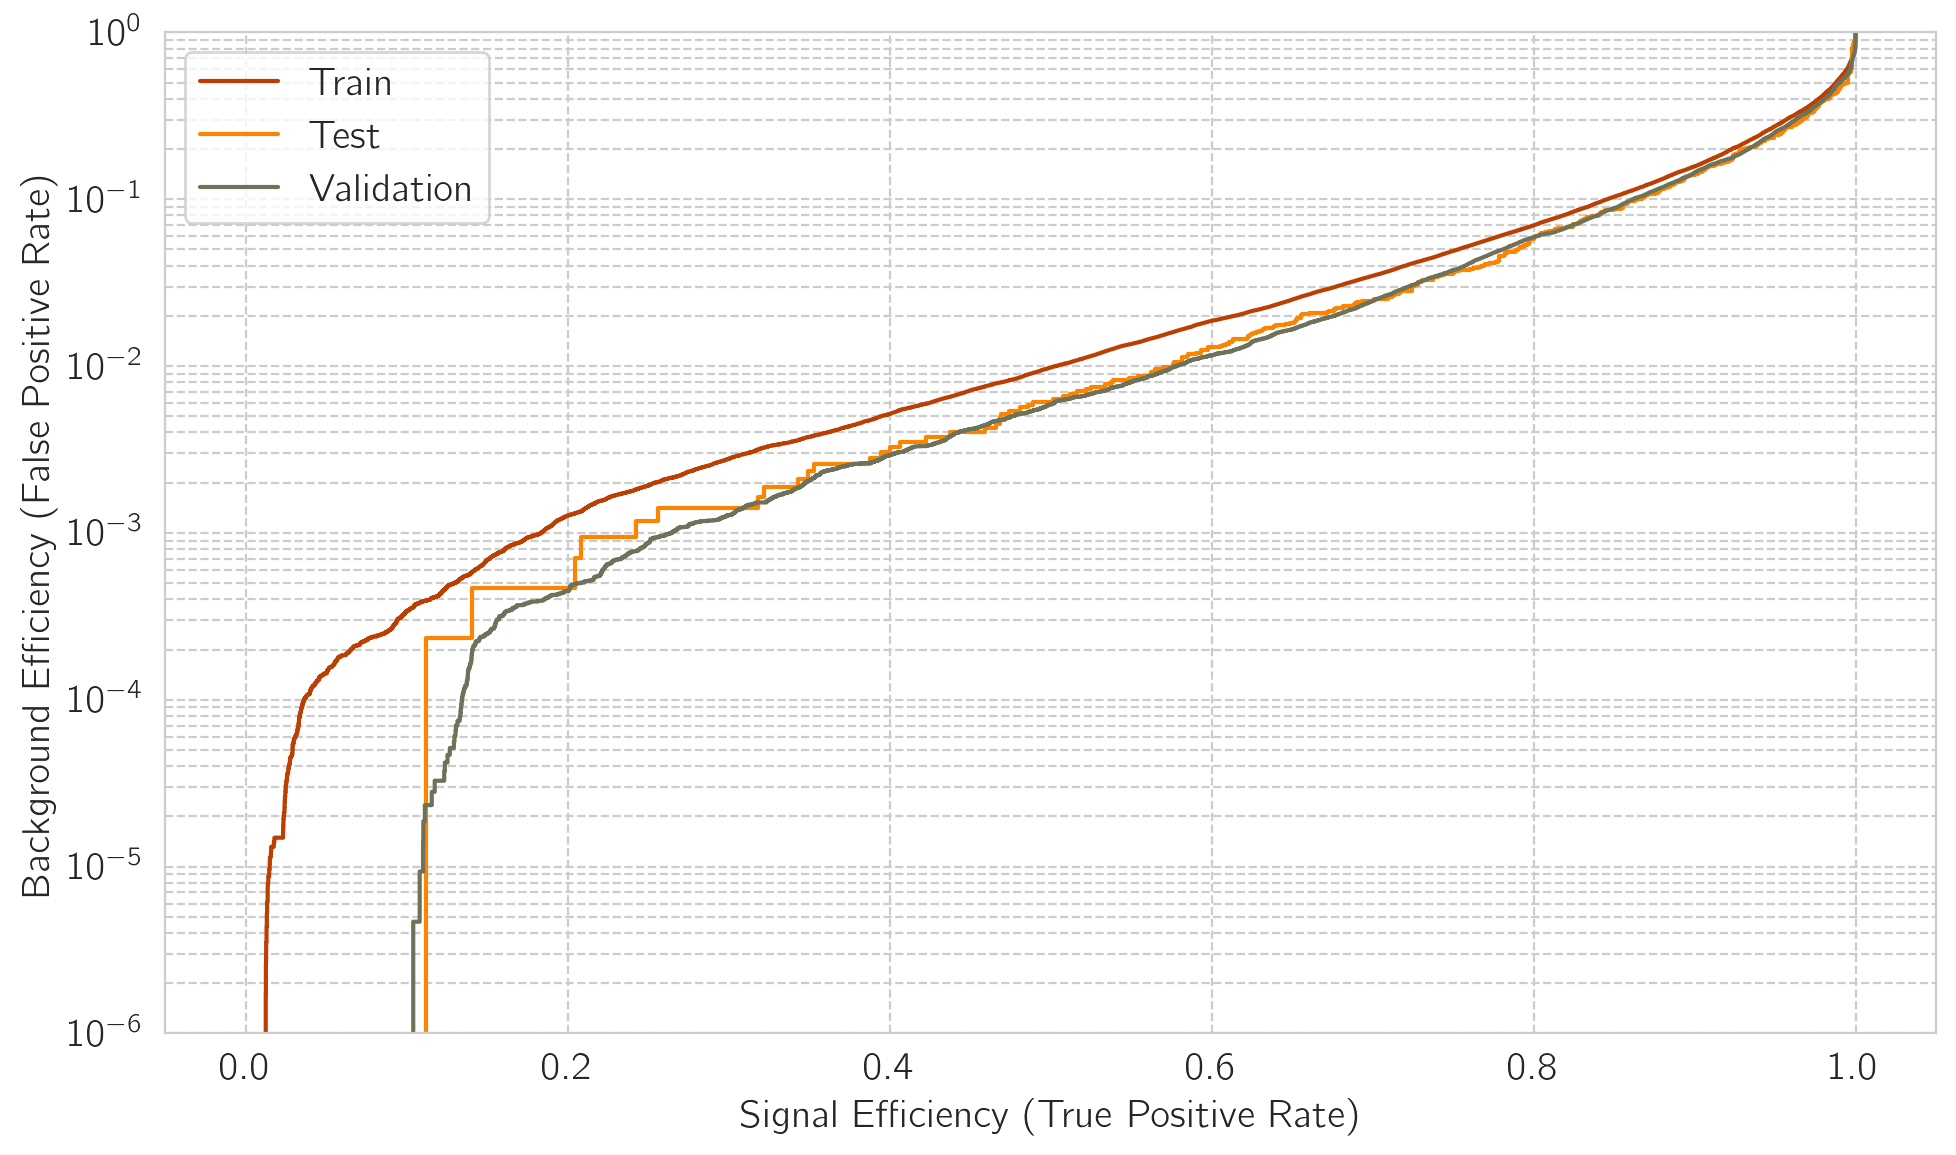

In [18]:

"""
    plt.plot(bin_centers_train_signal, density_train_signal, label='Train Signal', color='#126782')
    plt.plot(bin_centers_train_background, density_train_background, label='Train Background', color='#bb3e03')
    plt.plot(bin_centers_val_signal, density_val_signal, label='Validation Signal', color='#9b9b7a')
    plt.plot(bin_centers_val_background, density_val_background, label='Validation Background', color='#6f725a')
    plt.plot(bin_centers_test_signal, density_test_signal, label='Test Signal', color='#219ebc')
    plt.plot(bin_centers_test_background, density_test_background, label='Test Background', color='#fb8500')
"""

def plot_signal_vs_background_efficiency_adjusted(train_data, val_data):
    # Calculate ROC curve and AUC for training data
    fpr_train, tpr_train, _ = roc_curve(train_data['ground_truth'], train_data['ensemble_output'])
    background_efficiency_train = fpr_train  # Background Efficiency is the FPR for training data

    # Calculate ROC curve and AUC for validation data
    fpr_val, tpr_val, _ = roc_curve(val_data['ground_truth'], val_data['ensemble_output'])
    background_efficiency_val = fpr_val  # Background Efficiency is the FPR for validation data
    
    fpr_test, tpr_test, _ = roc_curve(test_data['ground_truth'], test_data['ensemble_output'])
    background_efficiency_test = fpr_test
    
    plt.figure(figsize=(10, 6), dpi=200)
    sns.set_style('whitegrid')
    # Plotting for training data
    plt.plot(tpr_train, background_efficiency_train, label='Train', color='#bb3e03')
    
    plt.plot(tpr_test, background_efficiency_test, label='Test', color='#fb8500')
    
    # Plotting for validation data
    plt.plot(tpr_val, background_efficiency_val, label='Validation', color='#6f725a')

    plt.xscale('linear')
    plt.yscale('log')  # Set Y-axis to logarithmic scale

    # Setting the limits for Y-axis from 10^-6 to 1
    plt.ylim(1e-6, 1)

    plt.xlabel('Signal Efficiency (True Positive Rate)')
    plt.ylabel('Background Efficiency (False Positive Rate)')
    # plt.title('Signal Efficiency vs Background Efficiency with Logarithmic Scale')
    plt.legend(loc='upper left')
    plt.grid(True, which="both", ls="--")  # Adding grid for both major and minor ticks
    plt.tight_layout()
    plt.savefig('/Users/hardie/hep-wg/figs/be-vs-se-logscale.png')
    plt.show()
plot_signal_vs_background_efficiency_adjusted(train_data, val_data)

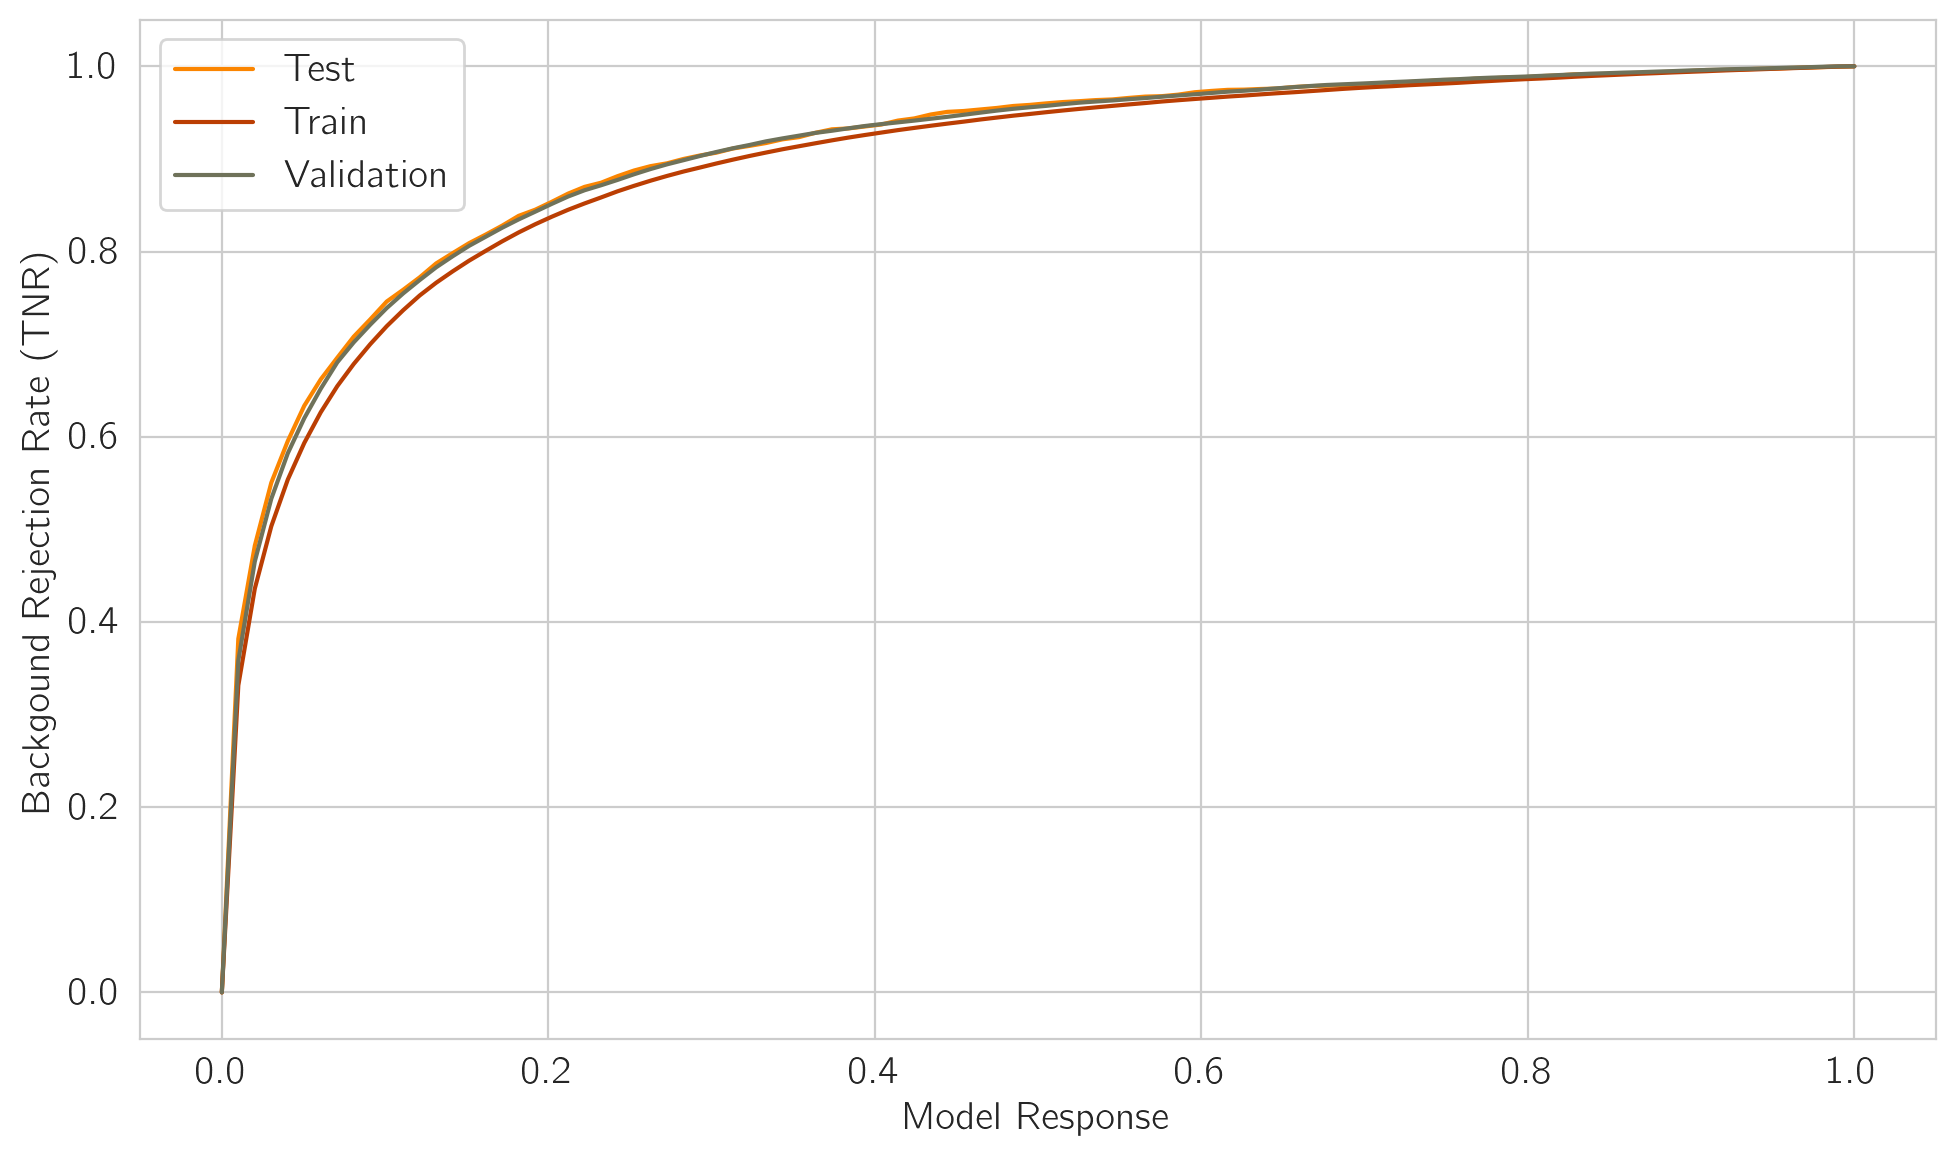

In [19]:
def calculate_tnr(y_true, scores, threshold):
    # Apply threshold to scores to get binary predictions
    predictions = scores >= threshold
    # Calculate confusion matrix elements
    tn, fp, fn, tp = confusion_matrix(y_true, predictions).ravel()
    # Calculate TNR
    tnr = tn / (tn + fp) if (tn + fp) > 0 else 0
    return tnr

true_labels = test_data['ground_truth']
scores = test_data['ensemble_output']

thresholds = np.linspace(start=min(scores), stop=max(scores), num=100)
# Calculate TNR for each threshold
tnr_values = [calculate_tnr(true_labels, scores, threshold) for threshold in thresholds]

train_true_labels = train_data['ground_truth']
train_scores = train_data['ensemble_output']
train_thresholds = np.linspace(start=min(train_scores), stop=max(train_scores), num=100)
train_tnr_values = [calculate_tnr(train_true_labels, train_scores, threshold) for threshold in train_thresholds]


val_true_labels = val_data['ground_truth']
val_scores = val_data['ensemble_output']
val_thresholds = np.linspace(start=min(val_scores), stop=max(val_scores), num=100)
val_tnr_values = [calculate_tnr(val_true_labels, val_scores, threshold) for threshold in val_thresholds]

# Plotting TNR against thresholds
plt.figure(figsize=(10, 6), dpi=200)
plt.plot(thresholds, tnr_values, label='Test', color='#fb8500')
plt.plot(train_thresholds, train_tnr_values, label='Train', color='#bb3e03')
plt.plot(val_thresholds, val_tnr_values, label='Validation', color='#6f725a')
plt.xlabel('Model Response')
plt.ylabel('Backgound Rejection Rate (TNR)')
# plt.title('TNR vs. Ensemble Output Threshold')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('/Users/hardie/hep-wg/br-vs-response.png')
plt.show()